In [30]:
from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np
import os


df = pd.read_csv(r"C:\Users\aniru\OneDrive\Desktop\PropNet\data\Twitter Analysis.csv")
print(f"Total tweets: {len(df)}")
df = df.dropna(subset=["tweet"]).reset_index(drop=True)


model = SentenceTransformer('all-MiniLM-L6-v2')


embeddings = model.encode(df["tweet"].tolist(), show_progress_bar=True)


os.makedirs("data", exist_ok=True)


np.save(r"C:\Users\aniru\OneDrive\Desktop\PropNet\data\tweet_embeddings.npy", embeddings)

import os
print("Current working directory:", os.getcwd())
print("Absolute save path:", os.path.abspath("data/tweet_embeddings.npy"))

print("✅ Embeddings generated and saved to 'data/tweet_embeddings.npy'")


Total tweets: 134198


Batches: 100%|██████████| 4194/4194 [07:49<00:00,  8.93it/s]


Current working directory: C:\Users\aniru\OneDrive\Desktop\PropNet\notebooks
Absolute save path: C:\Users\aniru\OneDrive\Desktop\PropNet\notebooks\data\tweet_embeddings.npy
✅ Embeddings generated and saved to 'data/tweet_embeddings.npy'


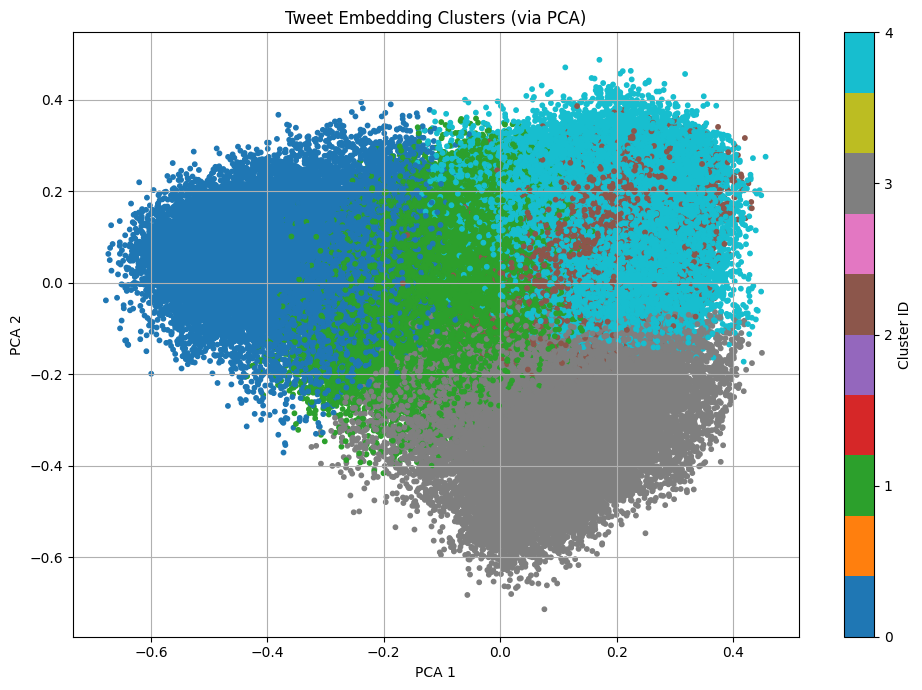

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


embeddings = np.load("data/tweet_embeddings.npy")


n_clusters = 5


kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(embeddings)


pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)


plt.figure(figsize=(10, 7))
scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=labels, cmap='tab10', s=10)
plt.title("Tweet Embedding Clusters (via PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(scatter, ticks=range(n_clusters), label='Cluster ID')
plt.grid(True)
plt.tight_layout()
plt.savefig("data/tweet_clusters.png")
plt.show()


In [36]:
import pandas as pd


df = pd.read_csv(r"C:\Users\aniru\OneDrive\Desktop\PropNet\data\Twitter Analysis.csv")

df = df.dropna(subset=["tweet"]).reset_index(drop=True)


df["cluster"] = labels


df.to_csv("data/tweets_with_clusters.csv", index=False)
print("✅ Clustered data saved to 'data/tweets_with_clusters.csv'")


✅ Clustered data saved to 'data/tweets_with_clusters.csv'


In [37]:
import pandas as pd


df = pd.read_csv("data/tweets_with_clusters.csv")


for cluster_id in sorted(df['cluster'].unique()):
    print(f"\n=== Cluster {cluster_id} ===")
    sample = df[df['cluster'] == cluster_id].sample(5, random_state=42)  # 5 sample tweets
    for tweet in sample["tweet"]:
        print("-", tweet[:280])



=== Cluster 0 ===
- @ChmnMendelson This is nothing short of evil!  Drug overdose in the US reached a peak over 100,000 according to the CDC, and suicide is the 2nd leading cause of death in children and teens.  Face mask have minimal benefit in slowing the spread of COVID, but please look at the men
- @SteveWasHereb4 @samanthamarika1 While you hid under your bed and only went out in public with gloves and 2 masks, I worked. I have very rarely worn a mask. I don't need a shot. You stay under your bed and let the normal people continue to live our lives in peace. Freak.
- So DMX took the covid vaccine then had a heart attack ??? Smh see that bs
- "He still doesn't get the severity of the outbreak." 
A source says: "He's not taking it seriously." Trump falsely claims children are almost immune to Coronavirus. No one is immune to this disease. 

A 2nd grader test positive after the first day of school in Georgia.
- @EricTopol "Given the substantial proportion of asymptomatic vaccine break

In [42]:
import networkx as nx


try:
    G = nx.read_gexf("../data/coordination_graph.gexf")
    print(f"✅ Coordination graph loaded successfully.")
    print(f"📊 Nodes: {G.number_of_nodes()}, Edges: {G.number_of_edges()}")
except FileNotFoundError:
    print("❌ File not found: Make sure 'data/coordination_graph.gexf' exists.")


✅ Coordination graph loaded successfully.
📊 Nodes: 4, Edges: 2
